In [1]:
# Libraries
from __future__ import division
import numpy as np
import random
import math

In [2]:
# Helper Functions
#
#
# Function: golden_search
#
# Required Parameters:
# 1. x, a list containing a scalar in each dimension, x1, x2, ... , xN 
# 2. d, a list containing a direction in each dimension, d1, d2, ... , dN
#
# Optional Parameters:
# 1. low, a point to lower bound the initial golden search
# 2. high, a point to upper bound the initial golden search
# 3. alpha, the golden ratio number
# 4. verbose, to echo each steps progress
def golden_search(x, d, F_MU, low=0, high=1, eps=0.1, alpha = 0.618, verbose=False):

    
    
    # min w = (x^2+y^2 + x*y) + (y^2+z^2 + y*z) + (x^2+z^2 + x*z) +
    #         (mu*( (-1/(x+y+z-1))+(-1/((x**2)+(y**2)+(z**2)-1)) ))

    def flambda(l):
        return ((x[0]-l*d[0])**2+(x[1]-l*d[1])**2 + (x[0]-l*d[0])*(x[1]-l*d[1]) + 
               (x[1]-l*d[1])**2+(x[2]-l*d[2])**2 + (x[1]-l*d[1])*(x[2]-l*d[2]) + 
               (x[0]-l*d[0])**2+(x[2]-l*d[2])**2 + (x[0]-l*d[0])*(x[2]-l*d[2]) +
                F_MU*( (-1/(((x[0]-l*d[0])) + ((x[1]-l*d[1])) +((x[2]-l*d[2])) -1)) +
                       (-1/((((x[0]-l*d[0]))**2) + (((x[1]-l*d[1]))**2) +(((x[2]-l*d[2]))**2) -1))
                  ))
               
    
    # # for x**2 + y**2 + z**2 = 1
    #def flambda(l):
    #    return ((x[0]-l*d[0])**2+(x[1]-l*d[1])**2 + (x[0]-l*d[0])*(x[1]-l*d[1]) + 
    #           (x[1]-l*d[1])**2+(x[2]-l*d[2])**2 + (x[1]-l*d[1])*(x[2]-l*d[2]) + 
    #           (x[0]-l*d[0])**2+(x[2]-l*d[2])**2 + (x[0]-l*d[0])*(x[2]-l*d[2])+
    #           F_MU*( (((x[0]-l*d[0]))**2 + ((x[1]-l*d[1]))**2 +((x[2]-l*d[2]))**2 -1)
    #                   
    #              )**2)
    
    # # for x + y + z = 1
    #def flambda(l):
    #    return ((x[0]-l*d[0])**2+(x[1]-l*d[1])**2 + (x[0]-l*d[0])*(x[1]-l*d[1]) + 
    #           (x[1]-l*d[1])**2+(x[2]-l*d[2])**2 + (x[1]-l*d[1])*(x[2]-l*d[2]) + 
    #           (x[0]-l*d[0])**2+(x[2]-l*d[2])**2 + (x[0]-l*d[0])*(x[2]-l*d[2])+
    #           F_MU*( (((x[0]-l*d[0])) + ((x[1]-l*d[1])) +((x[2]-l*d[2])) -1)
    #                   
    #              )**2)
    
    if verbose:
        print("*******************************")
        print("Executing Golden Ratio Search")
        print("*******************************")

    # Define Constants
    k=0
    
    # Create lists
    lam=list()
    mu=list()
    a=list()
    b=list()
    distances=list()
    
    # Step 1
    a.append(low)
    b.append(high)

    lam0 = a[k] + (1-alpha)*(b[k]-a[k])
    mu0 = a[k] + alpha*(b[k]-a[k])
    
    lam.append(lam0)
    mu.append(mu0)
    
    if verbose:
        print("************************")
        print(("[a,b]"), "|b[k]-a[k]|")
        print("************************")

    while True:
        distances.append(abs(b[k]-a[k])) 
        if verbose:
            print(a[k],b[k], distances[k])

        if(distances[k] < eps): # optimal soln lies within [a,b]
            break
        elif flambda(lam[k]) > flambda(mu[k]):
            # Step 2
            a.append(lam[k])
            b.append(b[k])
            lam.append(mu[k])
            mu.append(a[k+1] + alpha*(b[k+1]-a[k+1]))
        elif flambda(lam[k]) <= flambda(mu[k]):
            # Step3
            a.append(a[k])
            b.append(mu[k])
            mu.append(lam[k])
            lam.append(a[k+1]+(1-alpha)*(b[k+1]-a[k+1]))
        else:
            print("Something went wrong.")
            print("You must have approached infinity or you are infeasible.")
            

        k += 1
    
    #return random.uniform(a[-1], b[-1])
    return (a[-1]+b[-1])/2


In [3]:
# Barrier Method | Conjugate Gradient Method of Fletcher and Reeves p. 423
# min w = lambda x,y,z: (x**2+y**2 + x*y) + (y**2+z**2 + y*z) + (x**2+z**2 + x*y)+ (mu*( -1/(x+y+z-1)))
# start with large mu = 1000, progress down to smaller mu. Expect to approach optimal solution.
# We concluded the optimal solution was Problem (1) was around (0,0,0), so we expect to see the same convergence.

get_alpha = lambda ynext, ynow: (np.linalg.norm(ynext)**2) / (np.linalg.norm(ynow)**2)

def printer(index):
    print("X:",xList[index], "D:",dList[index], "Z:",zList[index], "l:",lList[index], "a:",aList[index], "mu:", mList[index])
    
results = [] # starting point, final soln

for mu in [1000, 100, 10, 1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    
    """
    Date | Comment
    2018 07 01 | Working Conjugate Gradient Method
    2018 07 15 | Barrier Method Working, next up include a second constraint and make sure it works as well.
    """
    
    #
    # Decision Variables:
    #
    # x,y,z
    #
    # Objective:
    #
    # min f = (x**2+y**2 + x*y) + 
    #         (y**2+z**2 + y*z) +
    #         (x**2+z**2 + x*y) + 
    #         (mu*( (-1/(x+y+z-1))+(-1/((x**2)+(y**2)+(z**2)-1)) ))
    #
    # Constraints:
    #
    #   s.t (1) x+y+z <= 1                | Beneath or on Hyper-plane.
    #       (2) x**2 + y**2 + z**2 <= 1   | Within or on Hyper-sphere.
    
    f = lambda x,y,z: (x**2+y**2 + x*y) + (y**2+z**2 + y*z) + (x**2+z**2 + x*y)+ (mu*( (-1/(x+y+z-1))+(-1/((x**2)+(y**2)+(z**2)-1)) ))
    fgradient = lambda x,y,z: np.array([4*x + y + z + mu*( (x+y+z-1)/((x+y+z-1)**2) + ((x**2)+(y**2)+(z**2)-1)/(((x**2)+(y**2)+(z**2)-1)**2)),
                                        4*y + x + z + mu*( (x+y+z-1)/((x+y+z-1)**2) + ((x**2)+(y**2)+(z**2)-1)/(((x**2)+(y**2)+(z**2)-1)**2)),
                                        4*z + x + y + mu*( (x+y+z-1)/((x+y+z-1)**2) + ((x**2)+(y**2)+(z**2)-1)/(((x**2)+(y**2)+(z**2)-1)**2))])
    
    # Initialization Step
    xList=[]
    dList=[]
    zList=[]
    aList=[]
    lList=[]
    mList=[]
    eps=0.01


    #x1=random.uniform(0,2*math.pi)
    #x2=random.uniform(0,2*math.pi)
    #x3=random.uniform(0,2*math.pi)

    #x1=random.randint(-1000, 1000)
    #x2=random.randint(-1000, 1000)
    #x3=random.randint(-1000, 1000)
    
    # Must start feasible and consistently.
    x1 = -100
    x2 = -100
    x3 = -100
    
    d1=fgradient(x1,x2,x3)[0]
    d2=fgradient(x1,x2,x3)[1]
    d3=fgradient(x1,x2,x3)[2]
    z=f(x1,x2,x3)

    xList.append((x1,x2,x3))
    dList.append((d1,d2,d3))
    zList.append(z)
    aList.append("nil")
    lList.append("nil")
    mList.append(mu)

    
    j=0
    while np.linalg.norm(fgradient(x1,x2,x3)) >= eps:

        printer(-1)

        lambd= golden_search(xList[-1], dList[-1], mu, verbose=False)
        
        #if lambd == "INF":
        #    results.append((xList[0],tuple(map(lambda x:np.round(x,decimals=5),xList[-1])),j, "INF"))
            
        
        lList.append(lambd)

        x1=xList[-1][0]-lambd*dList[-1][0]
        x2=xList[-1][1]-lambd*dList[-1][1]
        x3=xList[-1][2]-lambd*dList[-1][2]

        xList.append((x1,x2,x3))
        z=f(x1,x2,x3)
        zList.append(f(x1,x2,x3))

        alpha = get_alpha(fgradient(xList[-1][0],xList[-1][1],xList[-1][2]),  #new x,y,z
                          fgradient(xList[-2][0],xList[-2][1],xList[-2][2]))  #old x,y,z
        aList.append(alpha)

        d1=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[0] + alpha*dList[-1][0]
        d2=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[1] + alpha*dList[-1][1]
        d3=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[2] + alpha*dList[-1][2]
        dList.append((d1,d2,d3))
        j+=1
        
            
    print("*** Final Solution ***")
    print("Iteration Count: ", str(j))
    printer(-1)
    results.append((xList[0],tuple(map(lambda x:np.round(x,decimals=5),xList[-1])),mList[-1],j, zList[-1]))


X: (-100, -100, -100) D: (-603.2889246917312, -603.2889246917312, -603.2889246917312) Z: 90003.28892469173 l: nil a: nil mu: 1000
X: (15.228184616120657, 15.228184616120657, 15.228184616120657) D: (93.19457335479376, 93.19457335479376, 93.19457335479376) Z: 2063.259877387674 l: 0.191 a: 0.03645536388618224 mu: 1000
X: (2.6224464512979235, 2.6224464512979235, 2.6224464512979235) D: (528.8348047585948, 528.8348047585948, 528.8348047585948) Z: -134.65985976267433 l: 0.13526257711200002 a: 3.396605900793309 mu: 1000
X: (-21.22298777402637, -21.22298777402637, -21.22298777402637) D: (94.7550491485118, 94.7550491485118, 94.7550491485118) Z: 4068.45965285926 l: 0.045090516000000004 a: 0.44780664209833404 mu: 1000
X: (-25.49554183373813, -25.49554183373813, -25.49554183373813) D: (-36.971537279389764, -36.971537279389764, -36.971537279389764) Z: 5862.596267774996 l: 0.045090516000000004 a: 1.3550106520844072 mu: 1000
X: (-0.9800661018343355, -0.9800661018343355, -0.9800661018343355) D: (171.91

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
D=pd.DataFrame(results, columns=["X[0]", "X[N]","mu","Iteration Count", "Z"])
D.index.name="Sample #"
D.loc[0:4,"Z"]=9999


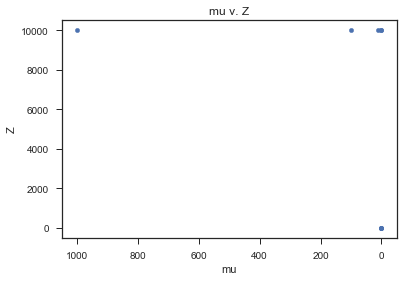

In [46]:
D[["mu","Z"]].plot.scatter("mu","Z",title="mu v. Z")
plt.gca().invert_xaxis()
plt.show()